<a href="https://colab.research.google.com/github/SilentSierra/DissDataAnalysis/blob/main/Representation_of_Women_in_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#raw_data_url = "https://raw.githubusercontent.com/SilentSierra/DissDataAnalysis/main/Representation_of_Women.csv"
raw_data_url = "https://raw.githubusercontent.com/SilentSierra/DissDataAnalysis/main/Representation_Final.csv"
def load_rep_data(url=raw_data_url):
  # download the csv file from github
  download = requests.get(url).content

  # read the downloaded content and put into dataframe
  df = pd.read_csv(io.StringIO(download.decode("cp1252")),index_col=0,infer_datetime_format=True,dayfirst=False, dtype={'ID': 'string', 'Gender': 'string', 'Age': 'string', 'Country': 'string', 'How often movies': 'string', 'How often games':'string', 'Women in media important':'string', 'Use Bechdel before':'string', 'Is Bechdel good?': 'string', 'Bechdel comments':'string', 'Modifications on Bechdel':'string', 'What Bechdel Mods':'string', 'Film good rep':'string', 'Games good rep':'string', 'Strength':'string', 'Strength comments':'string', 'Good strong traits':'string', 'Bad strong traits':'string', 'Historical context':'string', 'Context comments':'string', 'Representation changed':'string', 'Rep changed comments':'string', 'Film Narrative':'string', 'Film Characters':'string', 'Game Narrative':'string', 'Game Characters':'string', 'Game Gameplay':'string', 'Personally assess':'string'})
  df = df.fillna(" ")
  return df

In [4]:
rep_data = load_rep_data()

In [5]:
rep_data.head()

,Gender,Age,Country,How often movies,How often games,Women in media important,Use Bechdel before,Is Bechdel good?,Bechdel comments,Modifications on Bechdel,...,Historical context,Context comments,Representation changed,Rep changed comments,Film Narrative,Film Characters,Game Narrative,Game Characters,Game Gameplay,Personally assess
ID,,,,,,,,,,,,,,,,,,,,,
1,Woman,23-27,United Kingdom,At least once a week,At least once a day,Moderately important,No,No,Too_narrow,Yes,...,Historical accuracy/context can justify a lack...,if a historical movie is trying to accurately ...,Yes,Characters like people should have the ability...,"dialogue, importance","Appearance, behaviour, music","dialogue, importance","Abilities, appearance, interations",,
2,Man,18 - 23,Romania,At least once a week,At least once a day,Quite important,No,No,Too_narrow,Yes,...,Historical accuracy/context can justify a lack...,There are examples of historically important w...,Yes,"It heavily hinges on opinion, but generally, i...",Context,Actions,"Context, actions","Actions, appearance","character_development, roles","context, actions, morality, outcome"
3,Man,24-29,United Kingdom,At least once a week,At least once a day,Very important,"Yes, I have heard of it before",Yes,Indicative,No,...,Historical accuracy/context can justify a lack...,I think that as games are a form of art it is ...,Yes,,conflict,"Everything, appearance, dialogue, choices",Relationships,"Choices, dialogue, importance",,"Strength, writing, characterisation"
4,Man,36-41,Croatia,At least once a year,At least once a day,Quite important,"Yes, I have heard of and used it before",No,Can_fail_good_rep,Other (please clarify in Question 14 below),...,Historical accuracy/context can justify a lack...,Depends of what the movie is trying to achieve...,Yes,A representation of any character is going to ...,"setting, perspective",Well_written,"setting, perspective",Well_written,"genre, choices",
5,Genderfluid between non-binary and male,18 - 23,United Kingdom,At least once a day,At least once a day,Very important,"Yes, I have heard of and used it before",Other (please clarify in Question 12 below),Too_narrow,Other (please clarify in Question 14 below),...,Historical accuracy/context can justify a lack...,"Using the WW2 example, there’s plenty of films...",Yes,,"Setting, purpose, length","Actions, authentic, realistic","Tropes, writing","Relatability, variety",Varied_PCs,


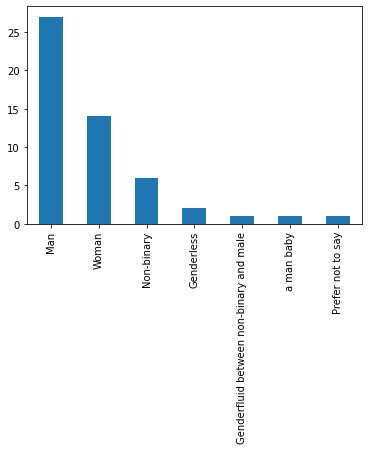

In [6]:
genderpie = rep_data.groupby(['Gender'])['Gender'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(genderpie, values='count', names='Gender', title='Participant gender')
fig.show()

rep_data['Gender'].value_counts(sort=False).plot(kind='bar', x = "gender", y = "frequency")

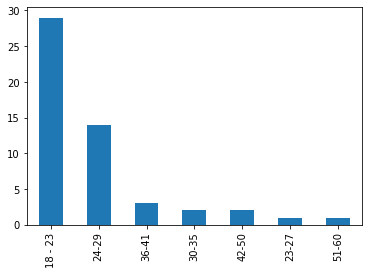

In [7]:
agepie = rep_data.groupby(['Age'])['Age'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(agepie, values='count', names='Age', title='Participant age')
fig.show()

rep_data['Age'].value_counts(sort=False).plot(kind='bar', x = "age", y = "frequency")

In [8]:
#import pandas
#from collections import Counter
#agecount = Counter(rep_data['Age'])
#df = pandas.DataFrame.from_dict(agecount, orient='index')
#df.plot(kind='bar')
#rep_data['Age'].value_counts(sort=False).plot(kind='bar', x = "age", y = "frequency")

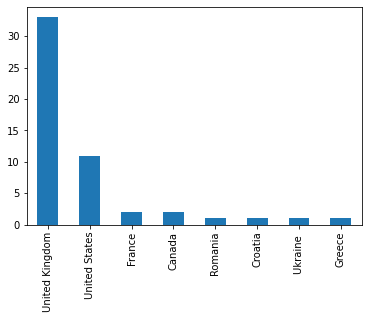

In [9]:
agepie = rep_data.groupby(['Country'])['Country'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(agepie, values='count', names='Country', title='Participant country')
fig.show()

rep_data['Country'].value_counts(sort=False).plot(kind='bar', x = "country", y = "frequency")

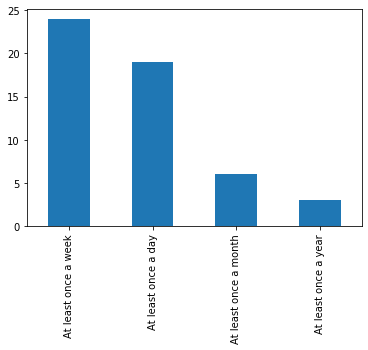

In [10]:
moviepie = rep_data.groupby(['How often movies'])['How often movies'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(moviepie, values='count', names='How often movies', title='How often participants watch movies/TV')
fig.show()

rep_data['How often movies'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

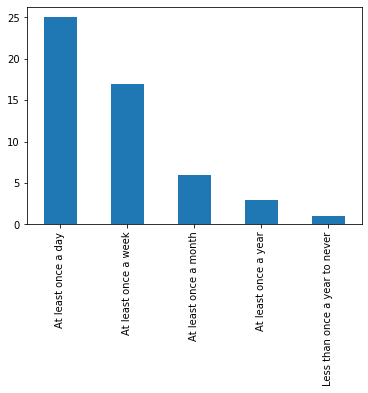

In [11]:
gamespie = rep_data.groupby(['How often games'])['How often games'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(gamespie, values='count', names='How often games', title='How often participants play video games')
fig.show()

rep_data['How often games'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

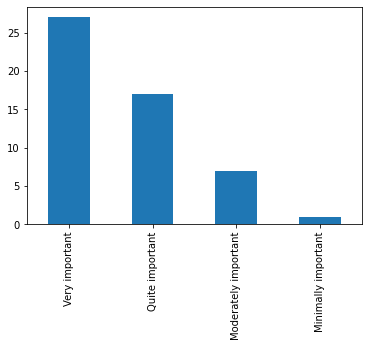

In [12]:
womenimportantpie = rep_data.groupby(['Women in media important'])['Women in media important'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Women in media important', title='Whether participants considered representation of women in media to be important')
fig.show()

rep_data['Women in media important'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

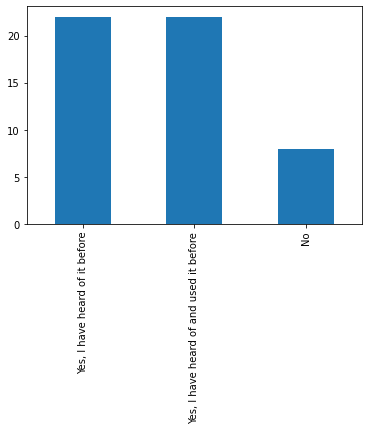

In [13]:
womenimportantpie = rep_data.groupby(['Use Bechdel before'])['Use Bechdel before'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Use Bechdel before', title='Whether participants have used the Bechdel test before')
fig.show()

rep_data['Use Bechdel before'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

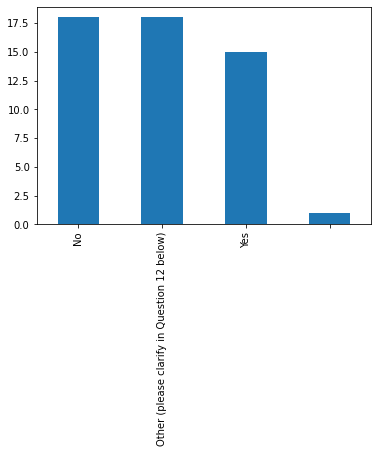

In [14]:
womenimportantpie = rep_data.groupby(['Is Bechdel good?'])['Is Bechdel good?'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Is Bechdel good?', title='Whether participants consider the Bechdel test to be effective')
fig.show()

rep_data['Is Bechdel good?'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

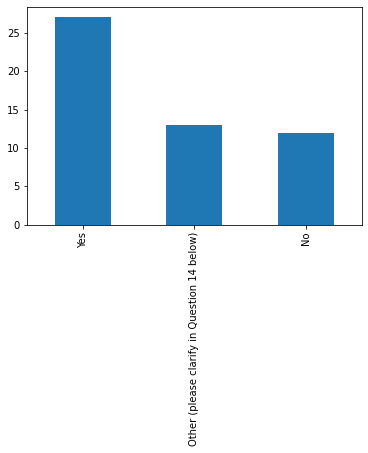

In [15]:
womenimportantpie = rep_data.groupby(['Modifications on Bechdel'])['Modifications on Bechdel'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Modifications on Bechdel', title='Whether participants consider modifications/additions to the Bechdel test would improve it')
fig.show()

rep_data['Modifications on Bechdel'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

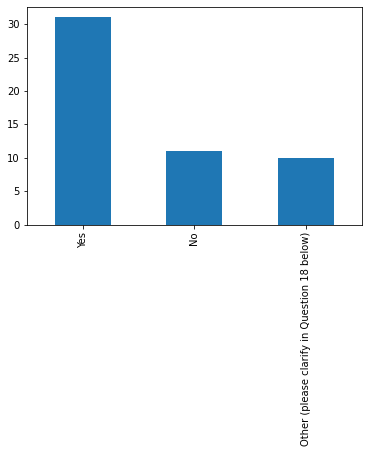

In [16]:
womenimportantpie = rep_data.groupby(['Strength'])['Strength'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Strength', title='Whether participants consider "strength" to be tied to specific character traits')
fig.show()

rep_data['Strength'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

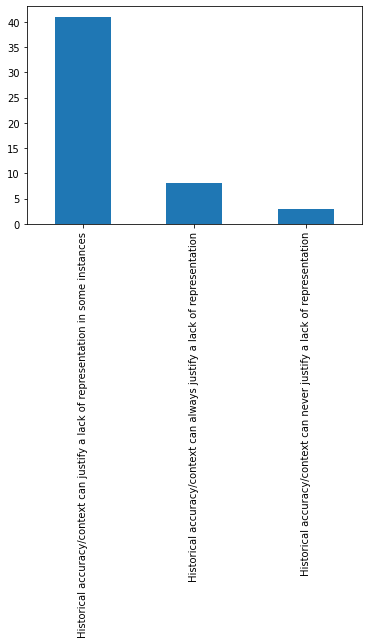

In [17]:
womenimportantpie = rep_data.groupby(['Historical context'])['Historical context'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Historical context', title='Whether participants consider historical context to justify a lack of representation')
fig.show()

rep_data['Historical context'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

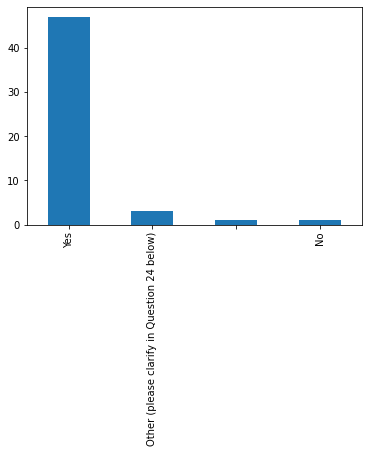

In [18]:
womenimportantpie = rep_data.groupby(['Representation changed'])['Representation changed'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Representation changed', title='Whether participants think a characters representation can be changed over time')
fig.show()

rep_data['Representation changed'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

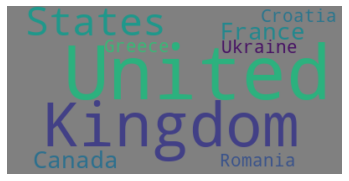

In [19]:
from wordcloud import WordCloud
#rep_data['Country'].isna().sum()
#rep_data['Country'].dropna(inplace = True)
text = " ".join(string for string in rep_data['Country'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

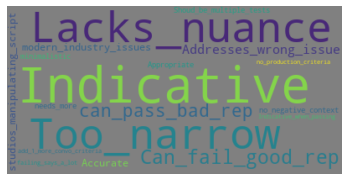

In [20]:
#from wordcloud import WordCloud
rep_data['Bechdel comments'].isna().sum()
#rep_data['Bechdel comments'].fillna(" ")
text2 = " ".join(string for string in rep_data['Bechdel comments'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text2)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

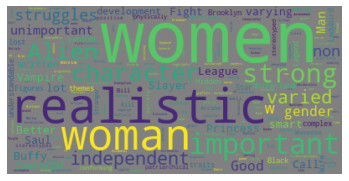

In [21]:
#from wordcloud import WordCloud
rep_data['Film good rep'].isna().sum()
#rep_data['Film good rep'].fillna(" ")
text3 = " ".join(string for string in rep_data['Film good rep'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

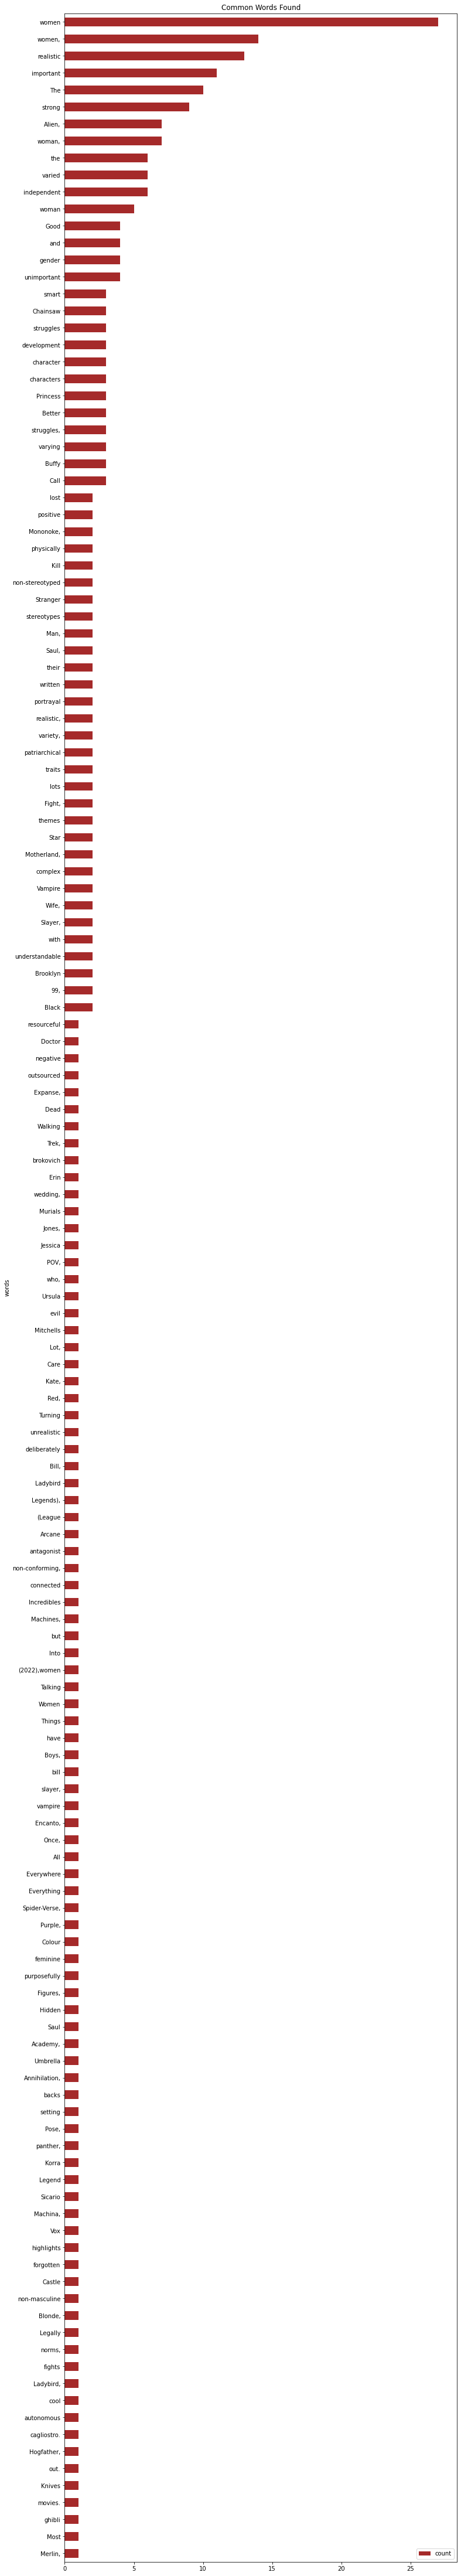

In [22]:
from collections import Counter
cnt = Counter()

for text in text3.split():
  if len(text) > 2:
    cnt[text] += 1
#cnt.most_common(150)

word_freq = pd.DataFrame(cnt.most_common(150),
                             columns=['words', 'count'])
word_freq.head()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 80))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")
ax.set_title("Common Words Found")
plt.show()

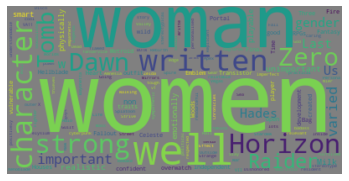

In [23]:
#from wordcloud import WordCloud
rep_data['Games good rep'].isna().sum()
#rep_data['Film good rep'].fillna(" ")
text3 = " ".join(string for string in rep_data['Games good rep'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
cnt2 = Counter()

for text in text3.split():
  cnt2[text] += 1
cnt2.most_common(150)

[('women', 18),
 ('of', 11),
 ('woman', 9),
 ('women,', 9),
 ('well-written', 8),
 ('Horizon', 7),
 ('in', 7),
 ('strong', 7),
 ('woman,', 6),
 ('Tomb', 5),
 ('important', 5),
 ('varied', 5),
 ('Zero', 5),
 ('gender', 5),
 ('Last', 5),
 ('w', 5),
 ('Raider,', 4),
 ('Dawn,', 4),
 ('unimportant', 4),
 ('Us,', 4),
 ('2,', 4),
 ('realistic', 4),
 ('Hades,', 4),
 ('the', 3),
 ('characters', 3),
 ('physically', 3),
 ('emotionally', 3),
 ('playable', 3),
 ('good', 2),
 ('The', 2),
 ('Metroid,', 2),
 ('Fire', 2),
 ('Emblem:', 2),
 ('Three', 2),
 ('Houses,', 2),
 ('character', 2),
 ('outfit', 2),
 ('dawn,', 2),
 ('characters,', 2),
 ('independent', 2),
 ('to', 2),
 ('Milk', 2),
 ('Bag', 2),
 ('Milk...,', 2),
 (',', 2),
 ('woman.', 2),
 ('Celeste,', 2),
 ('3,', 2),
 ('Final', 2),
 ('Fantasy', 2),
 ('smart,', 2),
 ('vulnerable', 2),
 ('open', 2),
 ('My', 2),
 ('Time', 2),
 ('at', 2),
 ('traits', 2),
 ('Woods,', 2),
 ('badass', 1),
 ('stereotype', 1),
 ('outer', 1),
 ('worlds', 1),
 ('resident', 1

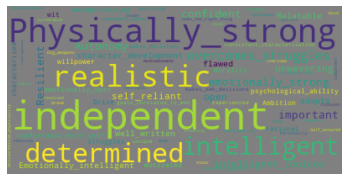

In [25]:
#from wordcloud import WordCloud
rep_data['Good strong traits'].isna().sum()
#rep_data['Film good rep'].fillna(" ")
text3 = " ".join(string for string in rep_data['Good strong traits'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

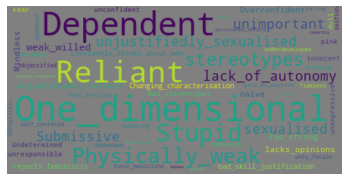

In [26]:
rep_data['Bad strong traits'].isna().sum()
text3 = " ".join(string for string in rep_data['Bad strong traits'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

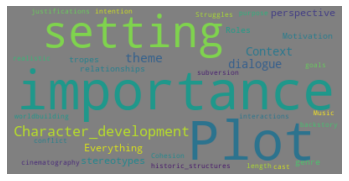

In [27]:
rep_data['Film Narrative'].isna().sum()
text3 = " ".join(string for string in rep_data['Film Narrative'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

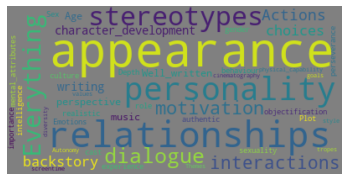

In [28]:
rep_data['Film Characters'].isna().sum()
text3 = " ".join(string for string in rep_data['Film Characters'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

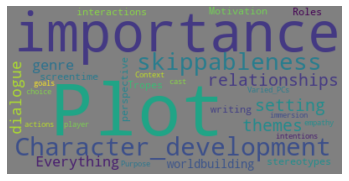

In [29]:
rep_data['Game Narrative'].isna().sum()
text3 = " ".join(string for string in rep_data['Game Narrative'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

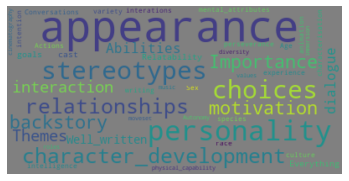

In [30]:
rep_data['Game Characters'].isna().sum()
text3 = " ".join(string for string in rep_data['Game Characters'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

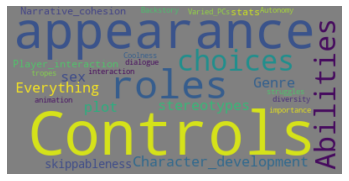

In [31]:
rep_data['Game Gameplay'].isna().sum()
text3 = " ".join(string for string in rep_data['Game Gameplay'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

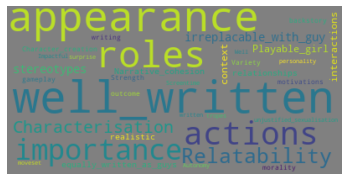

In [32]:
rep_data['Personally assess'].isna().sum()
text3 = " ".join(string for string in rep_data['Personally assess'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text3)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

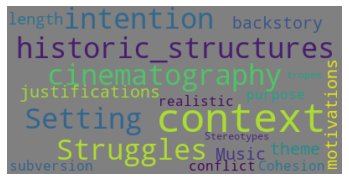

In [33]:
rep_data['Film Narrative'].isna().sum()
film = " ".join(string for string in rep_data['Film Narrative'])
film = film.split()
rep_data['Game Narrative'].isna().sum()
game = " ".join(string for string in rep_data['Game Narrative'])
game = game.split()

uniquefilms = (set(film) - set(game))
uniquefilms = " ".join(string for string in uniquefilms)
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(uniquefilms)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

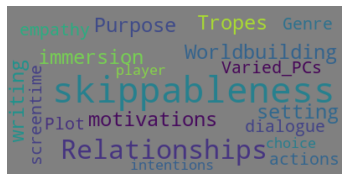

In [34]:
uniquegames = (set(game) - set(film))
uniquegames = " ".join(string for string in uniquegames)
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(uniquegames)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

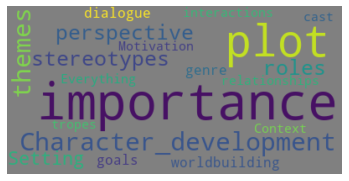

In [35]:
shared = (set(game) & set(film))
shared = " ".join(string for string in shared)
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(shared)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

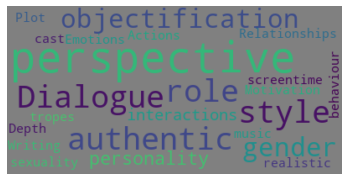

In [36]:
rep_data['Film Characters'].isna().sum()
film = " ".join(string for string in rep_data['Film Characters'])
film = film.split()
rep_data['Game Characters'].isna().sum()
game = " ".join(string for string in rep_data['Game Characters'])
game = game.split()

uniquefilms = (set(film) - set(game))
uniquefilms = " ".join(string for string in uniquefilms)
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(uniquefilms)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

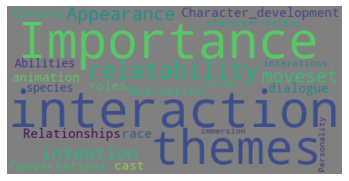

In [37]:
uniquegames = (set(game) - set(film))
uniquegames = " ".join(string for string in uniquegames)
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(uniquegames)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

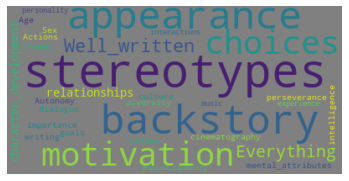

In [38]:
shared = (set(game) & set(film))
shared = " ".join(string for string in shared)
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(shared)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

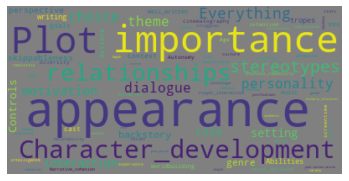

In [43]:
everything1 = " ".join(string for string in rep_data['Film Characters'])
everything2 = " ".join(string for string in rep_data['Film Narrative'])
everything3 = " ".join(string for string in rep_data['Game Narrative'])
everything4 = " ".join(string for string in rep_data['Game Characters'])
everything5 = " ".join(string for string in rep_data['Game Gameplay'])
everything = everything1 + everything2 + everything3 + everything4 + everything5
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(everything)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

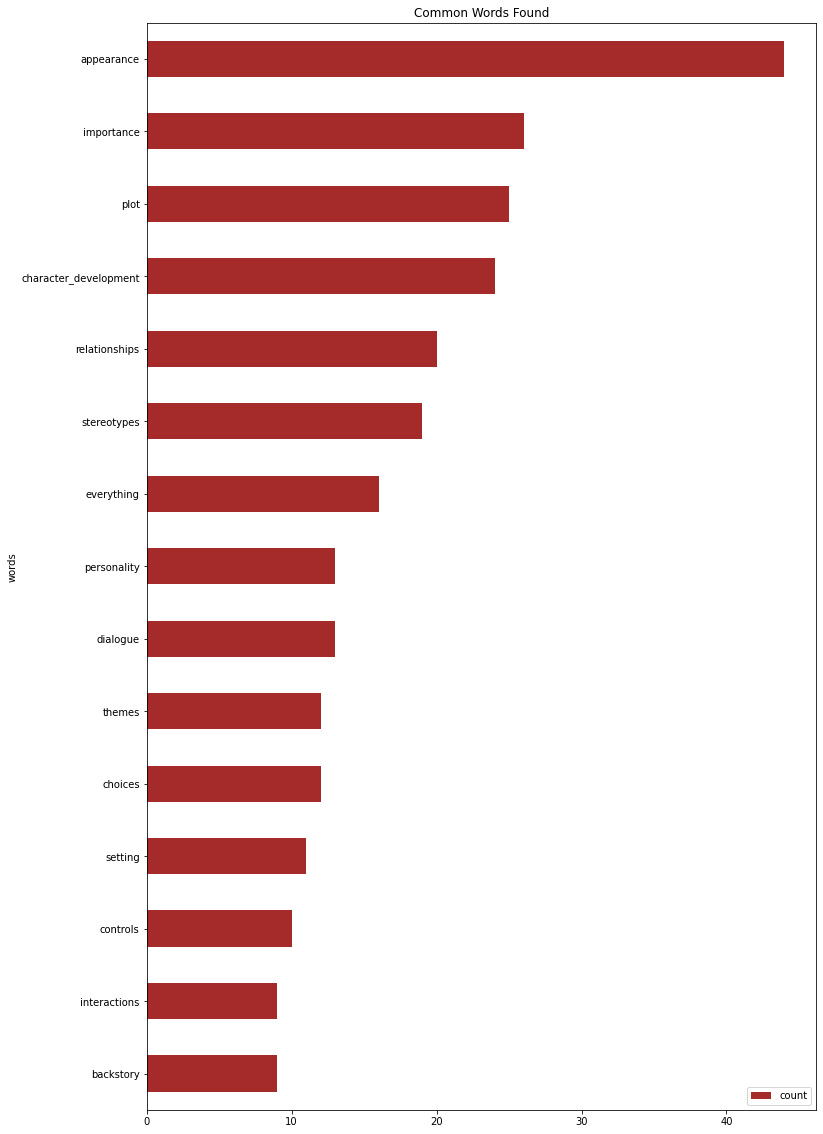

In [50]:
cnt2 = Counter()
everything = everything.lower()
for text2 in everything.split():
  text2 = text2.replace(',','')
  if len(text2) > 2:
    cnt2[text2] += 1
#cnt.most_common(150)

word_freq = pd.DataFrame(cnt2.most_common(15),
                             columns=['words', 'count'])
word_freq.head()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 20))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")
ax.set_title("Common Words Found")
plt.show()